In [ ]:
! pip install yfinance

Defaulting to user installation because normal site-packages is not writeable


Import libraries

In [ ]:
import yfinance as yf
from pprint import pprint

Download ticker history OHLCV

In [ ]:
TICKER = "SPY"

ticker = yf.Ticker(TICKER)
appl_data = ticker.history(period="30d")
appl_data = appl_data.reset_index(drop=True)

print(appl_data.head(3))

         Open        High         Low       Close     Volume  Dividends  \
0  410.823952  414.320941  409.120289  413.693298   87287000        0.0   
1  413.364505  418.116871  413.135376  417.678497   97177200        0.0   
2  418.615022  419.162974  415.805451  417.070740  103679700        0.0   

   Stock Splits  Capital Gains  
0           0.0            0.0  
1           0.0            0.0  
2           0.0            0.0  


Download ticker history Option chain data

In [ ]:
ticker = yf.Ticker(TICKER)

all_data = []

all_options_data = ticker.options

for k, option in enumerate(all_options_data): # all the expirations dates
    option_data = ticker.option_chain(option)
    print(k) #,option_data.calls.columns)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


In [ ]:
option_expiration_date = '2023-07-21'

In [ ]:
option_data = ticker.option_chain(option_expiration_date)
option_data

Options(calls=         contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0    SPY230721C00150000 2023-06-28 20:08:17+00:00   150.0     287.35  287.46   
1    SPY230721C00155000 2023-06-28 20:11:37+00:00   155.0     282.21  282.48   
2    SPY230721C00160000 2023-06-26 13:30:08+00:00   160.0     273.28  277.45   
3    SPY230721C00165000 2023-03-28 19:23:14+00:00   165.0     231.66  248.09   
4    SPY230721C00170000 2023-06-28 20:04:18+00:00   170.0     267.27  267.54   
..                  ...                       ...     ...        ...     ...   
171  SPY230721C00630000 2023-03-08 14:35:50+00:00   630.0       0.01    0.00   
172  SPY230721C00635000 2023-03-20 13:30:06+00:00   635.0       0.01    0.00   
173  SPY230721C00640000 2023-02-21 16:02:15+00:00   640.0       0.01    0.00   
174  SPY230721C00645000 2023-02-23 14:30:04+00:00   645.0       0.01    0.00   
175  SPY230721C00650000 2023-06-26 13:36:38+00:00   650.0       0.01    0.00   

        ask  change  perc

In [ ]:
option_data.puts.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPY230721P00150000,2023-06-15 14:37:29+00:00,150.0,0.01,0.0,0.01,0.0,0.0,43.0,32621,1.218754,False,REGULAR,USD
1,SPY230721P00155000,2023-06-13 19:52:19+00:00,155.0,0.01,0.0,0.01,0.0,0.0,2.0,8762,1.187504,False,REGULAR,USD
2,SPY230721P00160000,2023-06-09 13:58:40+00:00,160.0,0.01,0.0,0.01,0.0,0.0,315.0,4849,1.156254,False,REGULAR,USD
3,SPY230721P00165000,2023-06-12 20:01:02+00:00,165.0,0.01,0.0,0.01,0.0,0.0,1245.0,7042,1.125004,False,REGULAR,USD
4,SPY230721P00170000,2023-06-14 14:35:48+00:00,170.0,0.01,0.0,0.01,0.0,0.0,5.0,5798,1.093755,False,REGULAR,USD


(175.23499755859376, 788.5574890136719)

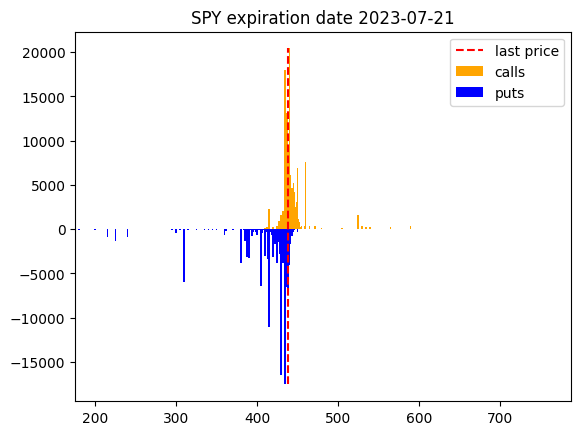

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
from pprint import pprint

plt.title( f"{TICKER} expiration date {option_expiration_date}" )

plt.bar( option_data.calls['strike'] , option_data.calls['volume'] , width = 2 , align = 'center' , color = 'orange' )
plt.bar( option_data.puts['strike'] , -option_data.puts['volume'] , width = 2 , align = 'center' , color = 'blue' )

plt.vlines( x = appl_data['Close'].iloc[-1],
           ymin = min(-option_data.puts['volume']) ,
           ymax = max(option_data.calls['volume']) ,
           linestyles = '--',
           colors = 'red' )

plt.legend( [ 'last price' , 'calls' , 'puts' ] )
plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.8])


(175.23499755859376, 657.1312408447266)

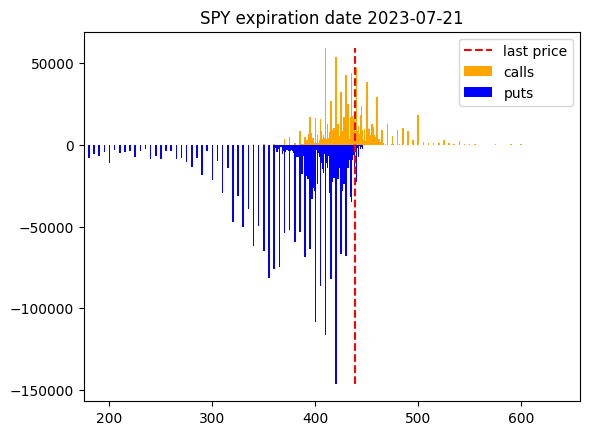

In [ ]:
plt.title(f"{TICKER} expiration date {option_expiration_date}")

plt.bar(option_data.calls['strike'], option_data.calls['openInterest'],width=1.5,align='center',color='orange')
plt.bar(option_data.puts['strike'], -option_data.puts['openInterest'],width=1.5,align='center',color='blue')

plt.vlines( x = appl_data['Close'].iloc[-1],ymin=min(-option_data.puts['openInterest']) ,
            ymax=max(option_data.calls['openInterest']) ,
            linestyles='--',
            colors='red')

plt.legend( [ 'last price' , 'calls' , 'puts' ] )

plt.xlim([appl_data['Close'].iloc[-1]*0.4, appl_data['Close'].iloc[-1]*1.5])

In [ ]:
import yfinance as yf

aapl = yf.Ticker(TICKER)
expiration_date = aapl.options[0]
options_chain = aapl.option_chain(expiration_date)
options_chain

#options_chain.calls.to_csv("aapl_calls.csv")
#options_chain.puts.to_csv("aapl_puts.csv")

Options(calls=        contractSymbol             lastTradeDate  strike  lastPrice    bid  \
0   SPY230629C00380000 2023-06-29 18:35:44+00:00   380.0      57.30  57.27   
1   SPY230629C00390000 2023-06-29 17:46:19+00:00   390.0      47.39  47.26   
2   SPY230629C00400000 2023-06-29 18:39:00+00:00   400.0      37.33  37.24   
3   SPY230629C00410000 2023-06-28 18:58:59+00:00   410.0      25.59  27.30   
4   SPY230629C00420000 2023-06-29 19:38:11+00:00   420.0      17.50  17.19   
5   SPY230629C00424000 2023-06-29 19:30:25+00:00   424.0      13.63  13.28   
6   SPY230629C00426000 2023-06-29 19:35:54+00:00   426.0      11.61  11.31   
7   SPY230629C00428000 2023-06-29 19:31:02+00:00   428.0       9.65   9.20   
8   SPY230629C00429000 2023-06-29 19:42:17+00:00   429.0       8.41   8.30   
9   SPY230629C00430000 2023-06-29 19:42:00+00:00   430.0       7.40   7.29   
10  SPY230629C00431000 2023-06-29 19:30:23+00:00   431.0       6.60   6.33   
11  SPY230629C00432000 2023-06-29 19:40:14+00:00  

/tmp/ipykernel_120586/1868594740.py:10: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_120586/1868594740.py:11: RuntimeWarning: invalid value encountered in sqrt
  gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
/tmp/ipykernel_120586/1868594740.py:10: RuntimeWarning: invalid value encountered in sqrt
  d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
/tmp/ipykernel_120586/1868594740.py:11: RuntimeWarning: invalid value encountered in sqrt
  gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))


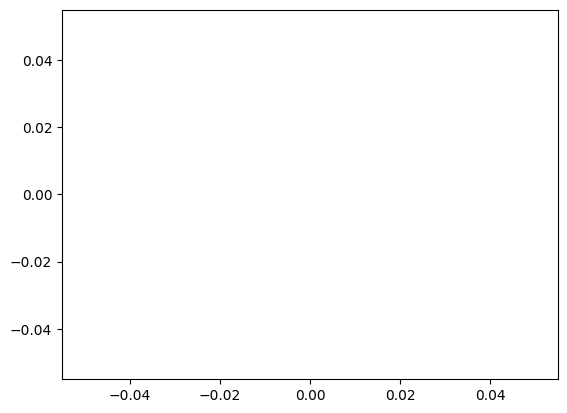

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import datetime
import matplotlib.pyplot as plt


def bs_gamma(S, K, T, r, sigma):
    d1 = (np.log(S/K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma

aapl = yf.Ticker(TICKER)
EXPIRATION_DATE = option_expiration_date
opt = aapl.option_chain(EXPIRATION_DATE)

df = pd.DataFrame(opt.calls)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df['Gamma'] = bs_gamma(df['lastPrice'], df['strike'], difference.days / 365, 0.01, df['impliedVolatility'])
df['level_call'] = df['Gamma'] * df['openInterest']

df2 = pd.DataFrame(opt.puts)
specific_date = datetime.date(2023, 6, 2)
today = datetime.date.today()
difference = specific_date - today
df2['Gamma'] = bs_gamma(df2['lastPrice'], df2['strike'], difference.days / 365, 0.01, df2['impliedVolatility'])
df2['level_puts'] = df2['Gamma'] * df2['openInterest']


plt.plot(df['strike'],df["level_call"],color='green')
plt.plot(df2['strike'],df2["level_puts"],color='red')

<BarContainer object of 172 artists>

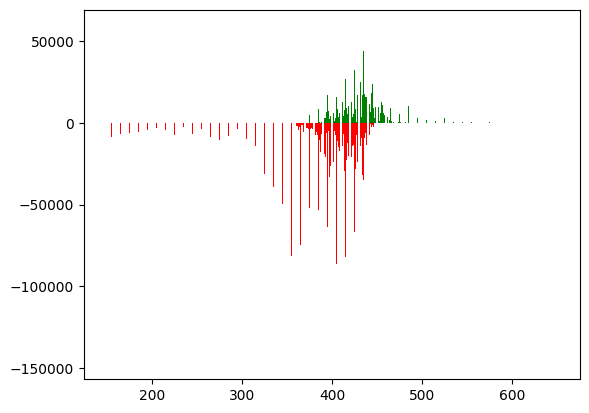

In [ ]:
plt.bar(df['strike'],df["openInterest"],color='green')
plt.bar(df2['strike'],-df2["openInterest"],color='red')

<BarContainer object of 172 artists>

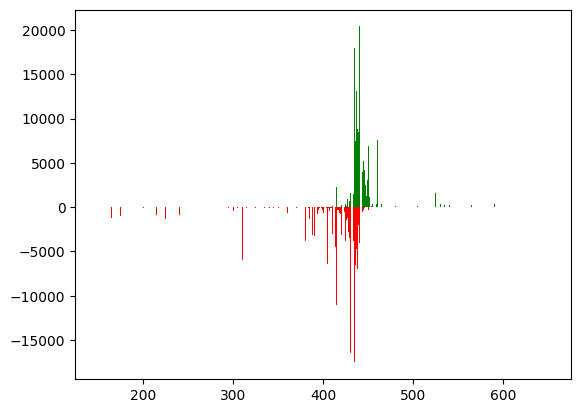

In [ ]:
plt.bar(df['strike'],df["volume"],color='green')
plt.bar(df2['strike'],-df2["volume"],color='red')

In [ ]:
import yfinance as yf
from scipy.stats import norm
import numpy as np

aapl = yf.Ticker("AAPL")
aapl_data = aapl.history(period="90d")
aapl_close = aapl_data['Close']


def black_scholes_call_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma


# sigma calculation
returns = aapl_data['Close'].pct_change()
sigma = np.sqrt(252) * np.std(returns)
z_score = norm.ppf(0.975)
call_sigma = z_score * sigma

# data calculation
stock_price = aapl_close[-1]
time_decay = 30 / 365
risk_free_rate = 0.01


df['gamma'] = None
df['GEX'] = None

df2['gamma'] = None
df2['GEX'] = None

for index, strike_price in df['strike'].items():
    call_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df.loc[index,'gamma'] = call_gamma
    df.loc[index,'GEX'] = call_gamma * df.loc[index,'openInterest']

for index, strike_price in df2['strike'].items():
    puts_gamma = black_scholes_call_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
    df2.loc[index,'gamma'] = puts_gamma
    df2.loc[index,'GEX'] = puts_gamma * df2.loc[index,'openInterest']

merged_df = pd.merge(df, df2, on='strike')


df.head()

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,Gamma,level_call,gamma,GEX
0,SPY230721C00150000,2023-06-28 20:08:17+00:00,150.0,287.35,287.46,288.06,0.0,0.0,8.0,16,0.000010,True,REGULAR,USD,NaN,NaN,0.001507,0.024119
1,SPY230721C00155000,2023-06-28 20:11:37+00:00,155.0,282.21,282.48,283.05,0.0,0.0,15.0,13,0.000010,True,REGULAR,USD,NaN,NaN,0.002906,0.037774
2,SPY230721C00160000,2023-06-26 13:30:08+00:00,160.0,273.28,277.45,278.04,0.0,0.0,6.0,8,0.000010,True,REGULAR,USD,NaN,NaN,0.005005,0.040041
3,SPY230721C00165000,2023-03-28 19:23:14+00:00,165.0,231.66,248.09,249.15,0.0,0.0,NaN,1,0.000010,True,REGULAR,USD,NaN,NaN,0.00778,0.00778
4,SPY230721C00170000,2023-06-28 20:04:18+00:00,170.0,267.27,267.54,268.10,0.0,0.0,2.0,2,1.156254,True,REGULAR,USD,NaN,NaN,0.011008,0.022015


In [ ]:
merged_df = pd.merge(df, df2, on='strike')
merged_df.head()

,contractSymbol_x,lastTradeDate_x,strike,lastPrice_x,bid_x,ask_x,change_x,percentChange_x,volume_x,openInterest_x,...,volume_y,openInterest_y,impliedVolatility_y,inTheMoney_y,contractSize_y,currency_y,Gamma_y,level_puts,gamma_y,GEX_y
0,SPY230721C00150000,2023-06-28 20:08:17+00:00,150.0,287.35,287.46,288.06,0.0,0.0,8.0,16,...,43.0,32621,1.218754,False,REGULAR,USD,NaN,NaN,0.001507,49.174941
1,SPY230721C00155000,2023-06-28 20:11:37+00:00,155.0,282.21,282.48,283.05,0.0,0.0,15.0,13,...,2.0,8762,1.187504,False,REGULAR,USD,NaN,NaN,0.002906,25.459403
2,SPY230721C00160000,2023-06-26 13:30:08+00:00,160.0,273.28,277.45,278.04,0.0,0.0,6.0,8,...,315.0,4849,1.156254,False,REGULAR,USD,NaN,NaN,0.005005,24.270124
3,SPY230721C00165000,2023-03-28 19:23:14+00:00,165.0,231.66,248.09,249.15,0.0,0.0,NaN,1,...,1245.0,7042,1.125004,False,REGULAR,USD,NaN,NaN,0.00778,54.787024
4,SPY230721C00170000,2023-06-28 20:04:18+00:00,170.0,267.27,267.54,268.10,0.0,0.0,2.0,2,...,5.0,5798,1.093755,False,REGULAR,USD,NaN,NaN,0.011008,63.822125


(306.66124572753904, 569.5137420654297)

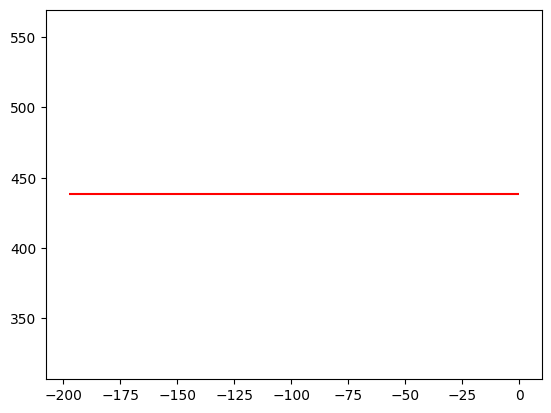

In [ ]:
plt.barh(merged_df['strike'], merged_df['GEX_x'])
plt.barh(merged_df['strike'], -merged_df['GEX_y'])

plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX_y']), xmax = max(merged_df['GEX_x']),colors='red')
plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])

In [ ]:
merged_df['GEX'] = merged_df['GEX_x'] - merged_df['GEX_y']

In [ ]:
#plt.barh(merged_df['strike'], merged_df['GEX'] )
#plt.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
#plt.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')
#plt.ylim([appl_data['Close'].iloc[-1]*0.7, appl_data['Close'].iloc[-1]*1.3])
#plt.xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])

In [2]:
# fig, ax = plt.subplots()
# fig.set_figheight(15)
# fig.set_figwidth(15)

# ax.barh(merged_df['strike'], merged_df['GEX'] )
# ax.plot(aapl_data.index- len(aapl_data.index) , aapl_data['Close'],color='black')
# ax.hlines(appl_data['Close'].iloc[-1],xmin = min(-merged_df['GEX']), xmax = max(merged_df['GEX']),colors='red',linestyles='--')

# ax.set_title(f"{TICKER} expiration date {option_expiration_date}")

# ax.legend( [ 'GEX Levels','last price' ] )

# for i, value in enumerate(merged_df['strike']):
#     side = 'right'
#     if merged_df['GEX'].iloc[i]>0: side = 'left'
#     if merged_df['GEX'].iloc[i]>0.5 or merged_df['GEX'].iloc[i]< -0.5:
#         ax.text(merged_df['GEX'].iloc[i], merged_df['strike'].iloc[i], str(round(merged_df['strike'].iloc[i])), ha=side, va='center')

# ax.text(0,appl_data['Close'].iloc[-1], str(round(appl_data['Close'].iloc[-1])), ha='left', va='center',fontsize=13)

# ax.text(100,merged_df['strike'].mean(), str(f"GEX levels \n {TICKER} expiration date {option_expiration_date} "), ha='left', va='center',fontsize=13,color='green', rotation='horizontal')

# ax.set_xlim([min(merged_df['GEX']),  max(merged_df['GEX'])])
# ax.set_ylim(bottom=appl_data['Close'].iloc[-1]*0.6,top=appl_data['Close'].iloc[-1]*1.4)

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks
from scipy.stats import norm
from datetime import datetime, date
import yfinance as yf
!pip install plotly==5.15.0
import plotly.graph_objects as go

def black_scholes_gamma(S, K, T, r, sigma):
    """
    S is the stock price
    K is the strike price
    T is the time to expiration
    r is the risk-free interest rate
    Sigma is the volatility of the stock.
    """
    d1 = (np.log(S/K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    gamma = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    return gamma


def get_gex_dataframe(ticker="AAPL", expiration_dates=['2023-06-02', '2023-06-09', '2023-06-16', '2023-06-23'], period="30d"):

    ticker_ = yf.Ticker(ticker)
    data = ticker_.history(period=period)
    data = data.reset_index(drop=True)

    try:
        ticker_info = ticker_.info
        real_name = ticker_info["longName"]
        print(f" Trading with {real_name}")
    except:
        pass

    # Initialize dataframes for merged results
    df_list = []
    df2_list = []

    for expiration_date in expiration_dates:
        option_data = ticker_.option_chain(expiration_date)

        expiration_date = datetime.strptime(expiration_date, '%Y-%m-%d').date()
        df = pd.DataFrame(option_data.calls)
        df2 = pd.DataFrame(option_data.puts)

        # sigma calculation
        returns = data['Close'].pct_change()
        sigma = np.sqrt(252) * np.std(returns)
        z_score = norm.ppf(0.975)
        call_sigma = z_score * sigma

        # data calculation

        today = datetime.today().date()
        t_days = (expiration_date - today).days

        time_decay = t_days / 365.0
        risk_free_rate = 0.01

        stock_price = data['Close'].iloc[-1]

        df['gamma'] = None
        df['GEX'] = None

        df2['gamma'] = None
        df2['GEX'] = None

        for index, strike_price in df['strike'].items():
            call_gamma = black_scholes_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
            df.loc[index,'gamma'] = call_gamma
            df.loc[index,'GEX'] = call_gamma * df.loc[index,'openInterest']

        for index, strike_price in df2['strike'].items():
            puts_gamma = black_scholes_gamma(S = stock_price, K = strike_price, T= time_decay, r = risk_free_rate, sigma = call_sigma)
            df2.loc[index,'gamma'] = puts_gamma
            df2.loc[index,'GEX'] = puts_gamma * df2.loc[index,'openInterest']

        df_list.append(df)
        df2_list.append(df2)

    # Merge and average GEX values
    df_merged = pd.concat(df_list)
    df2_merged = pd.concat(df2_list)

    df_merged['strike'] = pd.to_numeric(df_merged['strike'], errors='coerce')
    df2_merged['strike'] = pd.to_numeric(df2_merged['strike'], errors='coerce')

    df_merged = df_merged.groupby('strike').agg({'gamma': 'mean', 'GEX': 'mean'})
    df2_merged = df2_merged.groupby('strike').agg({'gamma': 'mean', 'GEX': 'mean'})

    # Reset the index to make 'strike' a regular column again
    df_merged = df_merged.reset_index()  # Reset index for df_merged
    df2_merged = df2_merged.reset_index()  # Reset index for df2_merged

    merged_df = pd.merge(df_merged, df2_merged, on='strike', suffixes=('_calls', '_puts'))
    merged_df['GEX'] = merged_df['GEX_calls'] - merged_df['GEX_puts']

    return data, merged_df


def final_plot(asset_data, merged_df, title='title', show_strike=False, set_boundaries=False):
    fig = go.Figure()

    # Adding bars for GEX
    fig.add_trace(go.Bar(
        x=merged_df['GEX'],
        y=merged_df['strike'],
        orientation='h',
        name='GEX Levels'
    ))


    # Adding horizontal line for last close price
    last_close = asset_data['Close'].iloc[-1]
    fig.add_trace(go.Scatter(
        x=[min(-merged_df['GEX']), max(merged_df['GEX'])],
        y=[last_close, last_close],
        mode='lines',
        line=dict(color='red', dash='dash'),
        name='Last Price'
    ))

    fig.update_layout(
        title=title,
        legend=dict(x=0, y=1.2),
        yaxis=dict(title='Strike'),
        xaxis=dict(title='GEX'),
        height=600,
        width=800
    )

    if show_strike:
        # Convert GEX to numeric
        merged_df['GEX'] = pd.to_numeric(merged_df['GEX'], errors='coerce')

        df = pd.DataFrame(merged_df, columns=['GEX'])
        most_extreme_values = pd.concat([df.nsmallest(10, 'GEX'), df.nlargest(10, 'GEX')])
        peaks_strikes = merged_df['strike'].iloc[most_extreme_values.index].to_list()

        for i, value in enumerate(merged_df['strike']):
            if (merged_df['GEX'].iloc[i] > max(merged_df['GEX'] / 10) or merged_df['GEX'].iloc[i] < -max(merged_df['GEX'] / 10)) and value in peaks_strikes:
                side = 'left' if merged_df['GEX'].iloc[i] > 0 else 'right'
                fig.add_annotation(
                    x=merged_df['GEX'].iloc[i],
                    y=merged_df['strike'].iloc[i],
                    text=str(merged_df['strike'].iloc[i]),
                    showarrow=True,
                    arrowhead=2,
                    ax=0 if side == 'left' else 100,
                    ay=0,
                    font=dict(size=9, color="Black"),
                    align="center"
                )

    if set_boundaries:
        fig.update_xaxes(range=[min(merged_df['GEX']) * 1.3, max(merged_df['GEX']) * 1.1])
        fig.update_yaxes(range=[asset_data['Close'].iloc[-1] * 0.5, asset_data['Close'].iloc[-1] * 1.3])

    fig.show()

tickers_SNP500 = ['MA','XOM','HD','V','META','JPM','KO','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_yahoofinance = ['SPY','GOOGL','BRK.B','MSFT','NVDA','AAPL','SPY','TSLA']
tickers_ninjatrader = ['SPY']


# ONLY FUTURES & OPTIONS compatible with yahoo finance
TICKER = "TSLA"

period_asset_price="max"
period_asset_price="90d"

ticker = yf.Ticker(TICKER)
print(ticker.options)
# = ticker_.options

#avaiable_expiration_dates = "[2023-06-02, 2023-06-09, 2023-06-16, 2023-06-23, 2023-06-30, 2023-07-07, 2023-07-21, 2023-08-18, 2023-09-15, 2023-10-20, 2023-11-17, 2023-12-15, 2024-01-19, 2024-03-15, 2024-06-21, 2024-09-20, 2024-12-20, 2025-01-17, 2025-06-20, 2025-12-19]"
#avaiable_expiration_dates = [i.replace('[','').replace(']','').replace(' ','') for i in avaiable_expiration_dates.split(',')]

#expiration_date = avaiable_expiration_dates[4]
#expiration_date = "2025-02-14"




#asset_data , merged_df = get_gex_dataframe( ticker = TICKER, expiration_date = expiration_date , period=period_asset_price )

#print(merged_df.columns)

#final_plot(asset_data, merged_df,
#          show_strike=True,
#          set_boundries=False,
#          title=f"GEX levels \n {TICKER} expiration date {expiration_date} ")

# Example usage with 4 dates
#expiration_dates = ["2025-02-14", "2025-02-21", "2025-02-28", "2025-03-07"]
#["2025-02-14", "2025-02-21", "2025-02-28", "2025-03-07", "2025-03-14", "2025-03-21", "2025-03-28"]

#expiration_dates = ["2025-02-14","2025-02-14", "2025-02-21", "2025-02-28", "2025-03-07", "2025-03-14", "2025-03-21", "2025-03-28", "2025-04-17", "2025-05-16", "2025-06-20", "2025-07-18", "2025-08-15", "2025-09-19", "2025-12-19", "2026-01-16", "2026-03-20", "2026-06-18", "2026-12-18", "2027-01-15"]

expiration_dates = ["2025-02-21"]


#asset_data, merged_df = get_gex_dataframe(ticker=TICKER, expiration_dates=expiration_dates, period="90d")
#print(merged_df)

# Plotting the result
#final_plot(asset_data, merged_df,
#          show_strike=True,
#          set_boundries=False,
#          title=f"GEX levels for {', '.join(expiration_dates)}")

asset_data, merged_df = get_gex_dataframe(ticker=TICKER, expiration_dates=expiration_dates, period="90d")
final_plot(asset_data, merged_df, show_strike=True, set_boundaries=False, title=f"GEX levels for {', '.join(expiration_dates)}")



('2025-02-21', '2025-02-28', '2025-03-07', '2025-03-14', '2025-03-21', '2025-03-28', '2025-04-04', '2025-04-17', '2025-05-16', '2025-06-20', '2025-07-18', '2025-08-15', '2025-09-19', '2025-11-21', '2025-12-19', '2026-01-16', '2026-03-20', '2026-06-18', '2026-09-18', '2026-12-18', '2027-01-15', '2027-06-17')
 Trading with Tesla, Inc.


Delta Neutral Hedging

In [ ]:
import yfinance as yf
from py_vollib.black_scholes.implied_volatility import implied_volatility
from py_vollib.black_scholes.greeks.analytical import delta


# Define the ticker symbol
ticker_symbol = "SPY"

# Fetch the option chain data for the ticker symbol
option_chain = yf.Ticker(ticker_symbol).option_chain(option_expiration_date)

# Get the option chain DataFrame
options = option_chain.calls

# Get the option chain DataFrames for calls and puts
calls = option_chain.calls
puts = option_chain.puts

# Calculate delta for each call option
calls["Delta"] = calls.apply(
    lambda row: delta("c", row["strike"], row["lastPrice"], 0.05 , 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Calculate delta for each put option
puts["Delta"] = puts.apply(
    lambda row: delta("p", row["strike"], row["lastPrice"], 0.05, 5 / 365, row["impliedVolatility"]),
    axis=1
)

# Concatenate calls and puts into a single DataFrame
options = pd.concat([calls, puts])

# Sort the options based on delta
sorted_options = options.sort_values("Delta")

# Find the option with delta closest to zero
delta_neutral_option = sorted_options.iloc[abs(sorted_options["Delta"]).idxmin()]

# Get the strike price for the delta-neutral option
delta_neutral_strike = delta_neutral_option["strike"]

print("Delta Neutral Strike Price:", delta_neutral_strike)


Delta Neutral Strike Price: 427.0


In [ ]:
merged_df['GEX']


0     -1.601087e-42
1     -1.990075e-40
2     -3.502148e-38
3     -1.144630e-35
4     -1.535018e-33
           ...     
156    2.516796e-03
157    7.180313e-05
158    9.238741e-04
159    4.338685e-06
160    4.551652e-06
Name: GEX, Length: 161, dtype: float64

In [ ]:
# merged_df['strike'].iloc[most_extreme_values.index]

In [ ]:
# 410.0 in merged_df['strike'].iloc[most_extreme_values.index].to_list()

In [ ]:
# GET MOST EXTREMES VALUES
merged_df['GEX'] = merged_df['GEX'].astype(float)

df = pd.DataFrame(merged_df, columns=['GEX'])
most_extreme_values = pd.concat([df.nsmallest(5, 'GEX'), df.nlargest(5, 'GEX')])
most_extreme_values.index
#ost_extreme_values.values

Int64Index([91, 71, 86, 76, 81, 121, 111, 130, 116, 115], dtype='int64')

In [ ]:
most_extreme_values

,GEX
91,-935.181095
71,-503.600212
86,-500.552135
76,-465.926489
81,-447.886972
121,445.288210
111,296.487021
130,293.990025
116,271.889741
115,189.822753


In [ ]:
for k,v in zip(most_extreme_values.index,most_extreme_values.values):
    #print(k,v[0])
    print(f"strike {merged_df['strike'].iloc[k]} {v[0]} ")


strike 420.0 -935.1810947584356 
strike 400.0 -503.60021194613046 
strike 415.0 -500.55213450864926 
strike 405.0 -465.92648935532156 
strike 410.0 -447.886972195227 
strike 450.0 445.288210386794 
strike 440.0 296.4870213337488 
strike 460.0 293.9900253040938 
strike 445.0 271.8897413519789 
strike 444.0 189.82275289282114 


In [ ]:
peaks, _ = find_peaks(merged_df['GEX'] , distance = 4 )

for i in peaks:

    print(merged_df['GEX'].iloc[i])
    #print(merged_df['strike'].iloc[i], merged_df['GEX'].iloc[i])

-3.2910743273488555e-05
-0.6500872510070311
-2.7560694698660386
-4.204629250878171
-11.285790420193758
-8.634865378336677
9.343188773200474
-11.929936746789927
-6.976323524908011
-59.668669807265005
-77.8430508611011
-78.52791368307032
133.27394464376007
296.4870213337488
271.8897413519789
445.288210386794
137.42499471549738
293.9900253040938
107.38653059962665
56.18759546488928
51.06763200053289
0.6884108635361308
0.008287157260194094


In [ ]:
# DOWNLAOD DATA

# Set the ticker symbol for the desired asset
ticker_symbol = "ES=F"

# Set the start and end dates for the data
start_date = "2022-01-01"
end_date = "2022-12-31"

# Download the data from Yahoo Finance
data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the downloaded data
print(data)

[*********************100%***********************]  1 of 1 completed
               Open     High      Low    Close  Adj Close   Volume
Date                                                              
2022-01-03  4771.00  4791.25  4747.50  4786.00    4786.00  1322362
2022-01-04  4785.25  4808.25  4764.50  4784.25    4784.25  1392809
2022-01-05  4783.50  4788.25  4689.50  4692.50    4692.50  1856376
2022-01-06  4692.00  4715.75  4662.00  4687.50    4687.50  1862918
2022-01-07  4695.00  4705.75  4653.75  4667.75    4667.75  1618440
...             ...      ...      ...      ...        ...      ...
2022-12-23  3850.00  3872.50  3821.25  3869.75    3869.75  1374913
2022-12-27  3878.00  3900.50  3837.25  3855.00    3855.00  1006414
2022-12-28  3858.00  3875.00  3804.50  3807.50    3807.50  1282810
2022-12-29  3811.00  3882.75  3806.25  3871.75    3871.75  1146984
2022-12-30  3869.75  3871.00  3821.50  3861.00    3861.00  1401810

[252 rows x 6 columns]
